In [0]:
# Pronóstico de la evolución de pacientes con diabetes

## Descripción del problema real

Los tratamientos médicos están basados en las expectativas de recuperación o el avance de una enfermedad para tomar decisiones. En este caso, un equipo médico desea contar con pronósticos de pacientes con diabetes para tomar decisiones sobre su tratamiento.

## Descripción del problema en términos de los datos

Se desea determinar el progreso de la diabeteis un año hacia adelante a partir de las variables medidas para 442 pacientes. La información está almacenada en el archivo `datos/diabetes.csv`. Las variables medidas son: edad, sexo, indice de masa corporal, presión sanguinea y seis medidas de serum en la sangre. Se desea pronósticar el progreso de la enfermedad a partir de las variables dadas.

## Aproximaciones posibles

En este caso, se desea comparar los resultados de un modelo de regresión lineal y un modelo de redes neuronales artificiales.

## Requerimientos

Usted debe:

* Determinar cuáles de las variables consideradas son relevantes para el problema.


* Determinar si hay alguna transformación de las variables de entrada o de salida que mejore el pronóstico del modelo.


* Construir un modelo de regresión lineal que sirva como base para construir un modelo de redes neuronales artificiales.



* Construir un modelo de redes neuronales artificiales. Asimismo, debe determinar el número de neuronas en la capa o capas ocultas.


* Utiizar una técnica como crossvalidation u otra similar para establecer la robustez del modelo.

In [0]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import tensorflow as tf 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Por favor mover la carpeta que le comparto "evaluacion-semoralesco-master" a su unidad antes de ejecutar este bloque de código
#para asegurar que la ruta especificada en el próximo bloque es correcta
#importación de los contenidos presentes del drive para poder leer los datos a utilizar en el modelo
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Verificar comentario del bloque de código superior
ubicacion = "/content/drive/My Drive/evaluacion-semoralesco-master/datos"

In [0]:
ds_diabetes = pd.read_csv("/content/drive/My Drive/evaluacion-semoralesco-master/datos/diabetes.csv")

In [0]:
#Obtención de variables X y Y respectivamente
X = ds_diabetes.drop(["Y"],axis = 1)
Y = ds_diabetes["Y"]

In [0]:
#Aplicación del estadístico t-student
x_sm = sm.add_constant(ds_diabetes.drop("Y",axis=1))
modelo = sm.OLS(ds_diabetes["Y"], x_sm)
results = modelo.fit()
pd.DataFrame(results.tvalues)

,0
const,59.061427
age,-0.167570
sex,-3.917184
bmi,7.813196
bp,4.958435
s1,-1.901163
s2,1.406187
s3,0.475431
s4,1.096538
s5,4.370394


In [0]:
x_sm = sm.add_constant(ds_diabetes.drop(["Y","age"],axis=1))
modelo = sm.OLS(ds_diabetes["Y"], x_sm)
results = modelo.fit()
pd.DataFrame(results.tvalues)

,0
const,59.127978
sex,-3.957639
bmi,7.823107
bp,5.023787
s1,-1.900534
s2,1.401996
s3,0.470042
s4,1.100334
s5,4.373286
s6,1.012756


In [0]:
x_sm = sm.add_constant(ds_diabetes.drop(["Y","age","s3"],axis=1))
modelo = sm.OLS(ds_diabetes["Y"], x_sm)
results = modelo.fit()
pd.DataFrame(results.tvalues)

,0
const,59.181242
sex,-3.984963
bmi,7.818292
bp,5.017619
s1,-3.031346
s2,1.602949
s4,1.054337
s5,5.777892
s6,1.029069


In [0]:
#MRL
#Se borran las variables "age", "s3" y "Y" debido a que son las que muestran menor impacto en las tablas anteriores
variables_a_borrar = ["age","s3","Y"]
resultados_MRL = []
X_train, X_test, y_train, y_test = train_test_split(ds_diabetes.drop(variables_a_borrar,axis=1),ds_diabetes["Y"] , test_size=0.3, random_state=101)
lr = LinearRegression()
lr.fit(X_train,y_train)
predicciones = lr.predict(X_test)
resultados_MRL.append([metrics.mean_absolute_error(y_test, predicciones), metrics.mean_squared_error(y_test, predicciones), np.sqrt(metrics.mean_squared_error(y_test, predicciones))])  
print('MAE:', metrics.mean_absolute_error(y_test, predicciones))
print('MSE:', metrics.mean_squared_error(y_test, predicciones))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicciones)))

MAE: 45.967979334993935
MSE: 3350.1952123709434
RMSE: 57.88087086741995


In [0]:
#Creación de la red neuronal con TensorFlow estimator
X_train, X_test, y_train, y_test = train_test_split(ds_diabetes.drop(["Y"],axis=1), ds_diabetes["Y"], test_size=0.2, random_state=101)
X_train.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [0]:
sex = tf.feature_column.numeric_column('sex')
bmi = tf.feature_column.numeric_column('bmi')
bp = tf.feature_column.numeric_column('bp')
s1 = tf.feature_column.numeric_column('s1')
s2 = tf.feature_column.numeric_column('s2')
s4 = tf.feature_column.numeric_column('s4')
s5 = tf.feature_column.numeric_column('s5')
s6 = tf.feature_column.numeric_column('s6')
feat_cols = [sex, bmi, bp, s1, s2,s4, s5, s6]
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=3000, shuffle=True)

In [0]:
#Estimación del número de neuronas
num_neuronas_capa = [2,4,8,16,32,64]
from sklearn.metrics import mean_squared_error
history_neuron = []
for i in num_neuronas_capa:
    modelo = tf.compat.v1.estimator.DNNRegressor(hidden_units=[i,i,i,i,i],feature_columns=feat_cols)
    modelo.train(input_fn=input_func,steps=5000)
    predict_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
        x=X_test,
        batch_size=10,
        num_epochs=1,
        shuffle=False)
    pred_gen = modelo.predict(predict_input_func)
    predictions = list(pred_gen)
    predicciones = []
    for j in predictions:
        predicciones.append(j['predictions'])   
    history_neuron.append(mean_squared_error(y_test,predicciones))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpsdg671am', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

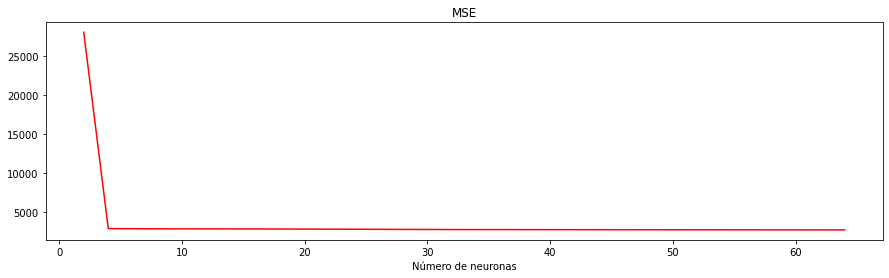

In [0]:
plt.figure(figsize=(15,4))
plt.xlabel('Número de neuronas')
plt.title("MSE")
plt.plot(num_neuronas_capa, history_neuron, 'r-')

Como puede apreciarse, luego de aproximadamente cuatro neuronas, el modelo permanece estático sin mejoras apreciables, por lo tanto se toman cuatro neuronas por capa como el valor óptimo.

In [0]:
#Estimación del número de capas de la red neuronal
capas = [[4],[4,4],[4,4,4],[4,4,4,4],[4,4,4,4,4],[4,4,4,4,4,4]]
hist_capas = []
for i in capas:
    modelo = tf.compat.v1.estimator.DNNRegressor(hidden_units=i,feature_columns=feat_cols)
    modelo.train(input_fn=input_func,steps=5000)
    predict_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
        x=X_test,
        batch_size=10,
        num_epochs=1,
        shuffle=False)
    pred_gen = modelo.predict(predict_input_func)
    predictions = list(pred_gen)
    predicciones = []
    for i in predictions:
        predicciones.append(i['predictions'])
    hist_capas.append(mean_squared_error(y_test,predicciones))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpc3tt4429', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

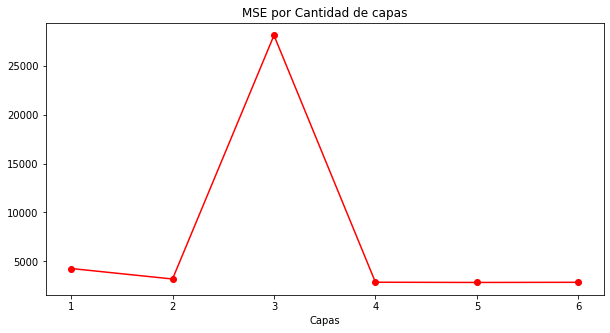

In [0]:
plt.figure(figsize=(10,5))
plt.xlabel('Capas')
plt.title("MSE por Cantidad de capas")
plt.plot([1,2,3,4,5,6], hist_capas, 'ro-')

Se determina el uso de 3 capas.

In [0]:
tf.compat.v1.reset_default_graph()
columnas = [sex, bmi, bp, s1, s2, s4, s5, s6]
modelo = tf.compat.v1.estimator.DNNRegressor(hidden_units=[4,4,4],feature_columns=columnas)
modelo.train(input_fn=input_func,steps=5000)
predict_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)
prediccion = modelo.predict(predict_input_func)
predictions = list(prediccion)
predicciones = []
for i in predictions:
    predicciones.append(i['predictions'])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpol7faw3w', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

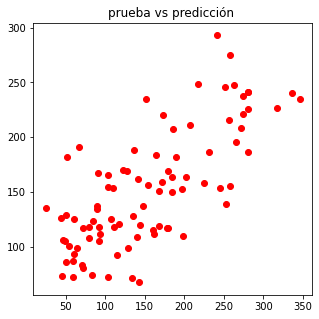

In [0]:
plt.figure(figsize=(5,5))
plt.title("prueba vs predicción ")
plt.scatter(y_test,predicciones,color="red")

In [0]:
mae_nn =  metrics.mean_absolute_error(y_test, predicciones)
mse_nn =  metrics.mean_squared_error(y_test, predicciones)
rmse_nn = np.sqrt(metrics.mean_squared_error(y_test, predicciones))

print('MAE:', metrics.mean_absolute_error(y_test, predicciones))
print('MSE:', metrics.mean_squared_error(y_test, predicciones))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicciones)))

MAE: 45.20690497923433
MSE: 2954.6260074935035
RMSE: 54.35647162476151


In [0]:
#Cross Validation
X = ds_diabetes.drop(["Y"],axis = 1).values
Y = ds_diabetes["Y"].values
def cross_validation(train_index, test_index,X,Y):        
    X_train, X_test = pd.DataFrame(X[train_index]), pd.DataFrame(X[test_index])
    y_train, y_test = pd.DataFrame(Y[train_index]), pd.DataFrame(Y[test_index])    
    X_train.columns = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
    X_test.columns = X_train.columns = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
    #y_train.columns = ["Y"]
    #y_test.columns = ["Y"]   
    sex = tf.feature_column.numeric_column('sex')
    bmi = tf.feature_column.numeric_column('bmi')
    bp = tf.feature_column.numeric_column('bp')
    s1 = tf.feature_column.numeric_column('s1')
    s2 = tf.feature_column.numeric_column('s2')
    s4 = tf.feature_column.numeric_column('s4')
    s5 = tf.feature_column.numeric_column('s5')
    s6 = tf.feature_column.numeric_column('s6')
    feat_cols = [sex, bmi, bp, s1, s2,s4, s5, s6]
    input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train, y= y_train[0], batch_size=10, num_epochs=3000, shuffle=False)    
    model = tf.compat.v1.estimator.DNNRegressor(hidden_units=[4,4,4],feature_columns=feat_cols)
    model.train(input_fn=input_func,steps=5000)
    predict_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)
    pred_gen = model.predict(predict_input_func)
    predictions = list(pred_gen)
    final_preds = []
    for pred in predictions:
        final_preds.append(pred['predictions'])   
    return metrics.mean_squared_error(y_test, final_preds)

In [0]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4)
resultado_cross = []
for train_index, test_index in kf.split(X):    
    resultado_cross.append(cross_validation(train_index,test_index,X,Y))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp0q_6ng_y', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

In [0]:
print("MSE Cross validation: ", np.array(resultado_cross).sum()/len(resultado_cross))

MSE Cross validation:  3044.486071570769
